<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/3_AnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Exploratory data analysis

This section analyzes the **input X-ray images**, the **labels** to predict and the **COVID-19** patients.

In [ ]:
# Packages
from tqdm import tqdm #barra de progreso`
import cv2
import numpy as np
import pandas as pd
import skimage
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 3.1 Input View
In this section we view images of **normal** cases, **covid** cases, **viral** pneumonia and **bacterial** pneumonia.

Reshape das imagens (200x200):

In [ ]:
print('X_all:',X_all.shape)

X_all: (8863, 200, 200, 1)


Normal:


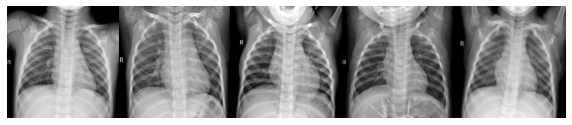

COVID-19:


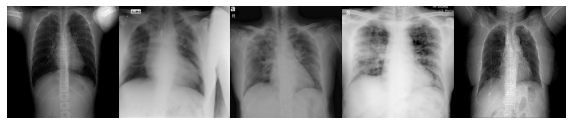

Pneumonia viral:


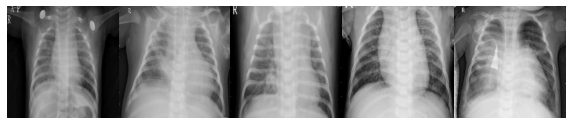

Pneumonia bacteriana:


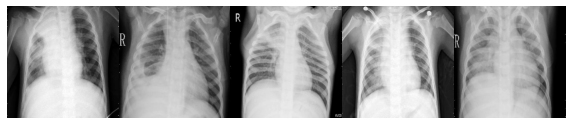

In [ ]:
############################ NORMAL
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==3:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Normal:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1,5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()
############################ COVID 19
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==0:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('COVID-19:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()
############################ VIRAL
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==1:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Pneumonia viral:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()
############################ BACTERIANA
index2=[]
for i in range(0,len(y_all),1):
  if y_all[i] ==2:
    index2.append(i)

plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('Pneumonia bacteriana:')
for l in index2[:5]:
    #print(i_)    
    plt.subplot(1, 5, i_+1) #.set_title(l)
    i_ += 1
    im = X_all[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')
plt.show()

The image below presents an image and the histogram that represents the intensity of the observed pixels.

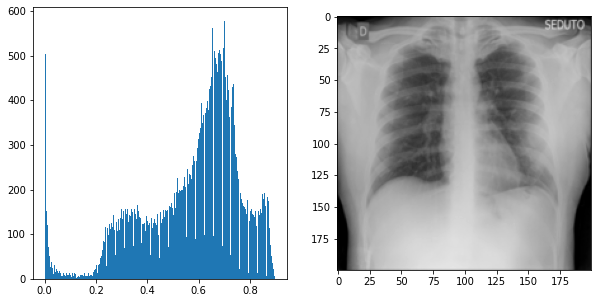

<Figure size 360x288 with 0 Axes>

Paciente: 0


In [ ]:
X_all200 = X_all.reshape(len(y_all),200,200)

def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.figure(figsize=(5,4))
    plt.show()
plotHistogram(X_all200[6200])
print('Paciente:',y_all[6200])

The previous graph proves that the images are already standardized, with pixels varying between 0 (black) and 1 (white). There is a greater concentration of light colors in the image, reflected in the histogram.

#### 3.2 Viewing labels

In the real imported data there are 4 labels with the following incidence:

In [ ]:
def count_labels(y_all):
    how_many_0 = len(np.where(y_all==0)[0])
    how_many_1 = len(np.where(y_all==1)[0])
    how_many_2 = len(np.where(y_all==2)[0])
    how_many_3 = len(np.where(y_all==3)[0])

    print('#covid:',how_many_0)
    print('#viral:',how_many_1)
    print('#bacteria:',how_many_2)
    print('#normal:',how_many_3)
    return how_many_0,how_many_1,how_many_2,how_many_3

#covid: 952
#viral: 2084
#bacteria: 974
#normal: 2819


Text(0.5, 1.0, '(952, 2084, 974, 2819)')

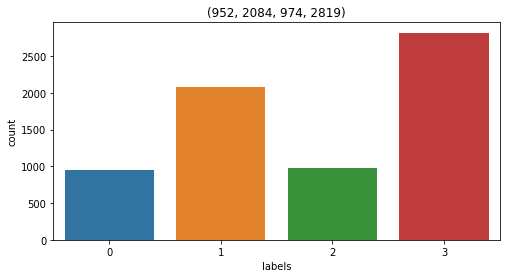

In [ ]:
plt.figure(figsize=(8,4))
map_characters = {0: 'COVID-19', 1: 'Viral Pneumonia', 2: 'Bacteriana', 3: 'Normal'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_all
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab).set_title(count_labels(y_all))

Percentage view:

#covid: 952
#viral: 2084
#bacteria: 974
#normal: 2819


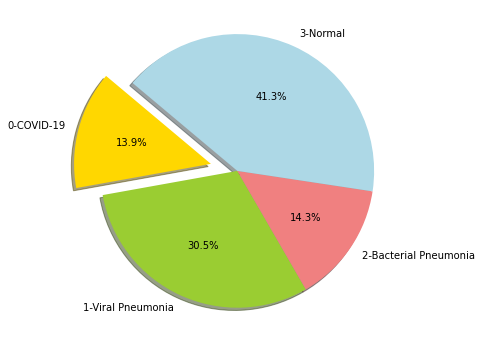

In [ ]:
plt.figure(figsize=(6,6))

labels = '0-COVID-19', '1-Viral Pneumonia', '2-Bacterial Pneumonia', '3-Normal'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightblue']
explode = (0.2, 0, 0, 0)  # explode 1st slice
sizes = count_labels(y_all)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

On this date, available: 
- 952 COVID-19,
- 2084 viral peumonia,
- 974 bacterial penumonia and
- 2819 normal situations.

The dataset is not balanced. It is anticipated that it may be advantageous:
* increase COVID-19 records, via **data generation** or **oversampling**
* aggregate the classes of viral and bacterial pneumonia into a class 'other pneumonias', given that bacterial pneumonia is poorly represented and it is not within the scope of the project to distinguish between viral and bacterial pneumonia.

### 3.3. Analysis of COVID-19 patients
This section incorporates characterization of individuals infected with COVID-19.

In [ ]:
url ='https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv'

covid = pd.read_csv(url, error_bad_lines=False)

In [ ]:
covid['finding'].value_counts()

COVID-19          420
todo               23
No Finding         17
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
Klebsiella          8
Pneumonia           8
Varicella           5
ARDS                4
Legionella          4
Bacterial           4
E.Coli              4
Chlamydophila       2
Influenza           2
Name: finding, dtype: int64

In [ ]:
covid.head()

patientid  ... other_notes
0          2  ...         NaN
1          2  ...         NaN
2          2  ...         NaN
3          2  ...         NaN
4          4  ...         NaN

[5 rows x 28 columns]

In [ ]:
import pandas as pd
covid['temperature'] = pd.to_numeric(covid['temperature'], errors='coerce')
covid['pO2_saturation'] = pd.to_numeric(covid['pO2_saturation'], errors='coerce')
covid['leukocyte_count'] = pd.to_numeric(covid['leukocyte_count'], errors='coerce')
covid['neutrophil_count'] = pd.to_numeric(covid['neutrophil_count'], errors='coerce')
covid['lymphocyte_count'] = pd.to_numeric(covid['lymphocyte_count'], errors='coerce')


The available variables are:
*age
*gender
*survival
* ventilation/ICU
*temperature
*oxygen saturation
*leukocyte count
*neutrophil count
*lymphocyte count

For continuous variables we have the following distributions:

In [ ]:
covid.iloc[:,2:].describe()

age  temperature  ...  neutrophil_count  lymphocyte_count
count  415.000000    41.000000  ...         26.000000         34.000000
mean    54.200000    39.643902  ...          4.787692          5.028235
std     15.919665     8.897276  ...          3.207725         22.267453
min     12.000000    36.400000  ...          0.000000          0.400000
25%     43.000000    37.800000  ...          2.725000          0.800000
50%     55.000000    38.200000  ...          3.950000          1.100000
75%     67.000000    39.000000  ...          6.112500          1.550000
max     88.000000    95.000000  ...         12.900000        131.000000

[8 rows x 6 columns]

It appears that age is the only field that is frequently filled in. The remaining variables have many MV. Check:
* ages between 12 and 88 years old (median 55 years old)
* temperatures between 36.4ºC and 95ºC (must be a *type*)
* percentages of O2 saturation in the blood between 20% and 340% (*type*), with 50% of individuals presenting values ​​of 80% saturation.

The graphs below show that for the sample of patients under analysis, COVID affects more men than women and most individuals survive.

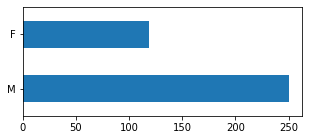

In [ ]:
covid['sex'].value_counts().head(30).plot(kind='barh', figsize=(5,2))

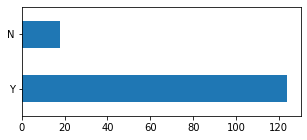

In [ ]:
covid['survival'].value_counts().head(30).plot(kind='barh', figsize=(5,2))

The graph below shows that the disease affects <u>all age ranges</u>.

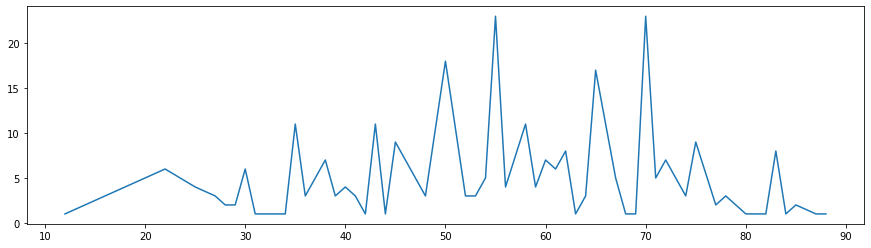

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(covid['age'].value_counts().sort_index())

The correlogram below analyzes relationships between the available variables:

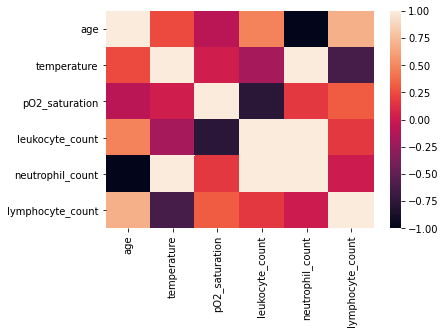

In [ ]:
corr = covid.iloc[:,2:].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

Correlação **negativa** entre:

    - idade e neutrófilos
    - temperatura e linfócitos
    - saturação oxigénio e leucócitos
    
Correlação positiva entre:

    - temperatura e neutrófilos
    - leucócitos e neutrófilos

The graph below shows a higher density of patients between 50-80 years old and a temperature around 38ºC.
However, the highest temperatures (40ºC) are experienced by younger individuals (30-50 years old). Remember, however, that the temperature record shows many MV.

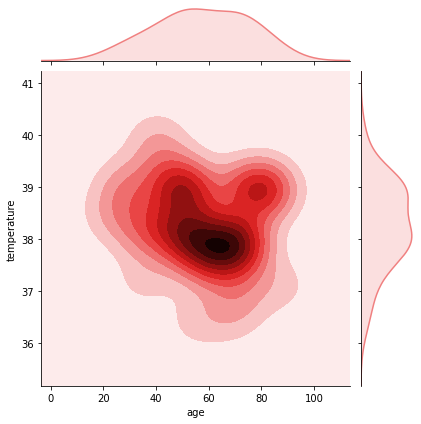

In [ ]:
sns.jointplot(x = "age",y = "temperature",data=covid[covid.temperature<=50],kind = "kde",color="lightcoral") # contour plot

The boxplots below relate **survival** to **gender** and age:
* 50% of men (M) who die are under the age of 50
* women (F) have a greater age range affected
* women who die are mostly of advanced age (>70 years)


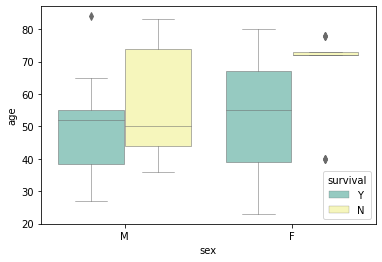

In [ ]:
ax = sns.boxplot(y="age", x="sex",hue="survival",data=covid[covid.survival!='?'], palette="Set3",linewidth=0.5)

Another representation that corroborates the above conclusions* (each dot represents an individual):

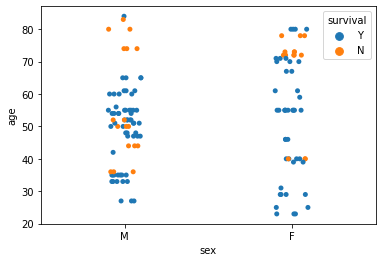

In [ ]:
sns.stripplot(x='sex', y='age', data=covid[covid.survival!='?'], jitter=True, hue='survival')

The graph below shows a need for ventilation:
*across all ages for men (M)
* essentially over 60 years old for women (F)

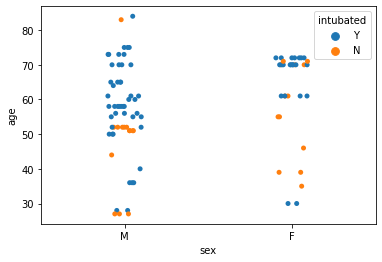

In [ ]:
sns.stripplot(x='sex', y='age', data=covid[covid.intubated!='?'], jitter=True, hue='intubated')